# ロジスティック関数とSoftMax関数

ディープラーニングの活性化関数として使われる関数の中に **ロジスティック関数** と **SoftMax関数** があります。

2つの関数の関係は「SoftMax関数はロジスティック関数の多次元版」と一言で言えます。ですのでやろうとしていることは同じなのですが、
式の形が異なるために、見え方を整理する必要があります。

まずはロジスティック関数とは何かから紹介します。

## ロジスティック関数

もしかしたら親和性を持ってもらえるかと感じましたので、少し、歴史をお話します。
ロジスティック関数は元々、生物学の分野で発展した関数です。そもそもは **ロジスティック方程式**として研究で扱われていました。

単一の生物が子孫繁栄で増殖する場合、いわゆる「ねずみ算式」に増える、と考えられていました。しかし、「出生率や死亡率によって変動するのでは？」と考えた人がいました。これを数式化したのが経済学者のマルサス（※マルクスではありません）で、このモデルを「マルサスモデル」といいます。

マルサスモデルは、次のような微分方程式でした。


#### 定義: マルサスモデル

とある瞬間の生物の個体数を$N(t)$、出生率を$b$、死亡率を$d$とする。このとき、単位時間$t$における個体数の増加率は

$$
\frac{dN(t)}{dt} = m N(t)
$$

と表せる。ただし$m=b-d$、つまり出生率-死亡率で定数とする。

---

### コラム: 微分方程式について

微分方程式と言う言葉は目にすることがあるかと思いますが、いったいどういうものかというと

$\frac{df(x)}{dx} = f(x) + K$

のように「一つの方程式に関数とその導関数が入っている」ような方程式を指します。これの答えは$x=\circ \circ$のようなものではなく、
$f(x)=$のように、元の関数がどのような関数かを求めることが目的です。

---



簡易に書いているため、修正率や死亡率を固定しています。微分方程式なので解き方を知らないと解けないのですが、 左辺は$N(t)$を微分しているので個体数の変化率を表しています。
一方は、(出生率-死亡率)にその瞬間の個体数を掛けています。言葉にすれば、「ある瞬間の個体数の変化率は、出生率から死亡率を引いたものにその瞬間の個体数をかけたものである」
ことを表しています。

もちろん、この式自体は現実的ではありません。出生率と死亡率だけを考えたら理にかなっていると言えますが、想像するに個体数が多くなったら食料や縄張りなどの関係で増加傾向は減少します。また個体数が少なくなったら十分に食料や縄張りに余裕が出て、増加することも考えられます。

この式の何が問題だったかというと、「出生率と死亡率しか考えなかった」ことです。上の想像の通りに「増えすぎたら減り、逆に減りすぎたら増える」ような$m$を決めてやればよいのではないか？と考えた人がいました。そして「良い感じ」の$m$が見つかりました。

$$m(t) = r \bigg(1 - \frac{N(t)}{K} \bigg)$$

少しだけ複雑になったかもしれませんが、$r,K$は正の定数です。mは元々定数でしたが、$N(t)$が入ったことで$t$に依存する関数になっています。
$N(t)$と$m(t)$をグラフで描画しています。





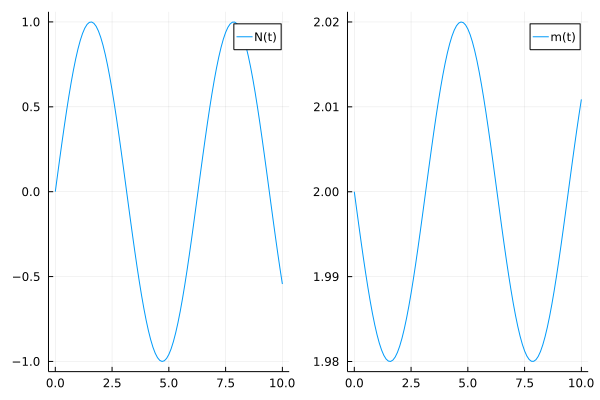

In [1]:
using Plots
# K, r は定数
K = 100.0
r = 2

# N は瞬間の個体数
N = x -> sin(x)

m = x -> r * (1 - N(x)/K)
T = 0:0.1:10

p1 = plot(T, N, label="N(t)")
p2 =plot(T, m, label="m(t)")

plot(p1, p2)

$N(t)$は一定の増減とわかりやすくなるように、$\sin(x)$にしています。

すると$t=0$では$sin(t) = 0$ですので、$m(t)$ の定義通りに分数が消えて $m(t)=r$　となっています。少し進むと$N(t)$が増加していますが、それに伴って$m(t)$は減少しています。更に進んで$t=2.5$ $N(t)$が減り始めると、今度は$m(t)$が増加傾向になりました。

「増えすぎたら減少傾向に、減りすぎたら増加傾向に」が実現できているように見えます。これをマルサスモデルに適用してみましょう。

$$
\frac{d N(t)}{dt} = r \bigg(1 - \frac{N(t)}{K} \bigg) N(t)
$$

これがロジスティック方程式です。きちんと定理にしておきます。


####　定理: ロジスティック関数

とある瞬間の生物の個体数を$N(t)$とし、また

$$m(t) = r \bigg(1 - \frac{N(t)}{K} \bigg)$$

とする。ただし、このときの$r,K$は正の実定数とする。このとき

$$
\frac{d N(t)}{dt} = r \bigg(1 - \frac{N(t)}{K} \bigg) N(t)
$$

をロジスティック方程式という。

このロジスティック方程式を解いた関数が **ロジスティック関数**です。解き方は参考書にまかせます。


経緯としてはいままでのようにしてロジスティック関数ができました。
しかしここでは、改めてロジスティック関数をさらに拡張した **シグモイド関数** をベースにロジスティック関数を定義します。機械学習でシグモイド関数も出てくるためです。


#### 定理: シグモイド関数・ロジスティック関数

$a$を任意の実定数とする。このとき

$$f(x) = \frac{1}{1 + e^{-ax}}$$

を **シグモイド関数** という。特にシグモイド関数が$a=1$のとき、つなわち

$$f(x) = \frac{1}{1 + e^{-x}}$$

をロジスティック関数、もしくは**標準シグモイド関数** という。


シグモイド関数を挟んでしまいましたが、元々は生物の増減に関する式だったことを頭に入れておいてもらえると、印象に残りやすい気がします。
また、シグモイド関数はディープラーニングでも活躍されている通りニューロンの性質のモデル化、と言う話もあるのですが、そいれはまた別の機会にします。

## SoftMax関数の解釈

ロジスティック関数は、次のようなグラフです。このグラフであることがディープラーニングで使われている理由を明確に表してくれます。

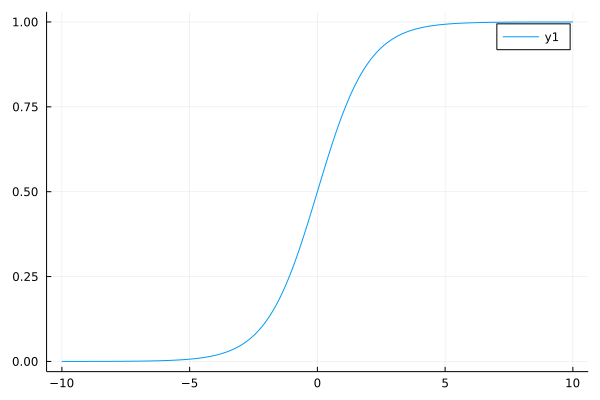

In [2]:
using Plots

f = x -> 1 / (1 + ℯ^(-x))
X = -10:0.1:10
plot(X, f)

$x$ が$-\infty$に近づくと$0$に近づき、$\infty$に近づくと$1$にに近づきます。シンプルに考えると「しきい値」となっていて、
「感染爆発」のようにある程度増えると莫大に増えるというようなことを見るときには適しています。

もう一つ飲み方として「0より大きく1より小さい」というのが、ロジスティック関数の持つ強い性質です。
というのも「0より大きく1より小さい」というのは **確率**　ととても親和性が高い性質なのです。

ロジスティック関数の場合は「$x$がとある値のとき、確率や状態はどのような状態か」を表しています。具体的な数値で見ていきましょう。

In [3]:
using Plots
using Printf

f = x -> 1 / (1 + ℯ^(-x))
X = -5:5

for x=X
    @printf("x=%d のとき確率は %.6f\n", x, f(x)) 
end



x=-5 のとき確率は 0.006693
x=-4 のとき確率は 0.017986
x=-3 のとき確率は 0.047426
x=-2 のとき確率は 0.119203
x=-1 のとき確率は 0.268941
x=0 のとき確率は 0.500000
x=1 のとき確率は 0.731059
x=2 のとき確率は 0.880797
x=3 のとき確率は 0.952574
x=4 のとき確率は 0.982014
x=5 のとき確率は 0.993307


確率は0から1を推移するため、1から起こる確率を引けば「起こらない確率」を表現できます。

In [4]:
using Plots
using Printf

f = x -> 1 / (1 + ℯ^(-x))
X = -5:5

for x=X
    @printf("x=%d のときに起こる確率は %.6f で起こらない確率は %.6f\n", x, f(x), (1-f(x))) 
end



x=-5 のときに起こる確率は 0.006693 で起こらない確率は 0.993307
x=-4 のときに起こる確率は 0.017986 で起こらない確率は 0.982014
x=-3 のときに起こる確率は 0.047426 で起こらない確率は 0.952574
x=-2 のときに起こる確率は 0.119203 で起こらない確率は 0.880797
x=-1 のときに起こる確率は 0.268941 で起こらない確率は 0.731059
x=0 のときに起こる確率は 0.500000 で起こらない確率は 0.500000
x=1 のときに起こる確率は 0.731059 で起こらない確率は 0.268941
x=2 のときに起こる確率は 0.880797 で起こらない確率は 0.119203
x=3 のときに起こる確率は 0.952574 で起こらない確率は 0.047426
x=4 のときに起こる確率は 0.982014 で起こらない確率は 0.017986
x=5 のときに起こる確率は 0.993307 で起こらない確率は 0.006693


SoftMax関数の場合も同様の考え方ですが、SoftMax関数の場合は起こる確率がコインの裏表のように「$x$であるかないか」ではなく、
サイコロで何の目が出るかのような「$x_1,x_2,\dots,x_n$のいずれか」の場合を考えます。

コインの裏表をそれぞれ等しい確率で上を向くとすると、それぞれの確率は$\frac{1}{2}$で足し合わせると1になります。

サイコロの出目をそれぞれ等しい確率で上を向くとすると、それぞれの確率は$\frac{1}{6}$で足し合わせると1になります。

**確率は一つ一つは0以上1以下で必ず足し合わせると1になる**、と言う性質はとても当たり前ですが確率論において最も重要であるといっても過言でない性質です。


まずはSoftMax関数の定義を紹介します。

#### 定義: SoftMax関数

$n$次ベクトル
$\bold{x}=
\begin{pmatrix}
x_1\\
x_2\\
\vdots\\
x_i\\
\vdots\\
x_n
\end{pmatrix}$
に対して

$$\sigma(x)_k = \frac{e^{x_k}}{\sum_{i=1}^n e^{x_i}}$$

を　**SoftMax関数** という。


この関数を観察してみましょう。$\sigma$が邪魔なので、展開してみます。


$$
\frac{e^{x_k}}{\sum_{i=1}^n e^{x_i}} 
=
\frac{e^{x_k}}{e^{x_1} + e^{x_2} + \dots e^{x_k} + \dots + e^{x_n}}
$$

$e^{x_k}$が分子分母にありますね。しかも、$e^x$は$x$がどの値をとっても0より大きいです。


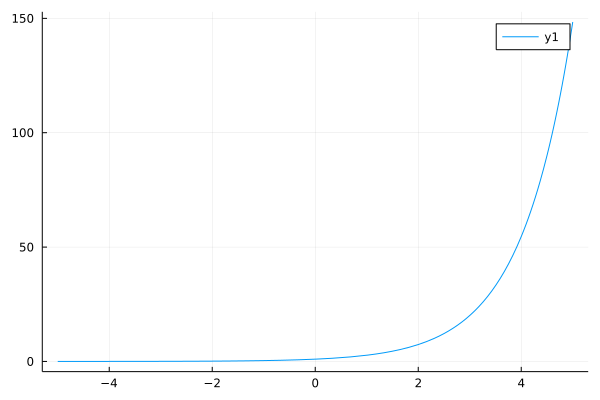

In [7]:
using Plots

f = x -> ℯ^x

plot(f)

ですので、必ず $e^{x_k} < e^{x_1} + e^{x_2} + \dots e^{x_k} + \dots + e^{x_n}$となります。すなわち

$$0 < \frac{e^{x_k}}{\sum_{i=1}^n e^{x_i}}$$

であることが言えます**（重要1）**。

さらに、すべての$k$についての$\sigma(x)_k$を足すと、

$$
\begin{aligned}
\frac{e^{x_1}}{\sum_{i=1}^n e^{x_i}}
+
\frac{e^{x_2}}{\sum_{i=1}^n e^{x_i}}
+
\dots
+
\frac{e^{x_n}}{\sum_{i=1}^n e^{x_i}}
&=
\frac{e^{x_1} + e^{x_2} + \dots + e^{x_n}}{\sum_{i=1}^n e^{x_i}}\\
\\
&=
\frac{\sum_{i=1}^n e^{x_i}}{\sum_{i=1}^n e^{x_i}}\\
\\
&= 1
\end{aligned}
$$

とすべてを足し合わせると1になります**（重要2）**。

重要1と重要2を合わせると次のことがいえます。

$$0 < \frac{e^{x_k}}{\sum_{i=1}^n e^{x_i}} < \frac{\sum_{i=1}^n e^{x_i}}{\sum_{i=1}^n e^{x_i}} = 1$$

言葉で表せば「$\displaystyle \frac{e^{x_k}}{\sum_{i=1}^n e^{x_i}}$ は0より大きく1より小さい数で、すべての$k$について足し合わせると1になる」という
いわゆる「確率の性質」を持っています。ここでの$x_i$は$\bold{x}$の要素でしたので、次の図のような変換です。

GitHubだと表示されないので、URLを開いてください。

<a href="https://www.geogebra.org/calculator/bj2vgjrg?embed" target="_blank">GeoGebra SoftMax関数<a>
    
青色のベクトルを動かすとそれに伴ってSoftMax関数を反映したオレンジ色のベクトルが動きます。
    

In [8]:
#Genieをインストール
using Pkg
Pkg.add("Genie")
using Genie; up;
HTML("""
<iframe src="https://www.geogebra.org/calculator/bj2vgjrg?embed" width="800" height="600" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>    
""")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


HTML{String}("<iframe src=\"https://www.geogebra.org/calculator/bj2vgjrg?embed\" width=\"800\" height=\"600\" allowfullscreen style=\"border: 1px solid #e4e4e4;border-radius: 4px;\" frameborder=\"0\"></iframe>    \n")

オレンジ色のベクトルの終端は、必ず$y=-x+1$上を動きます。これは移行すると$x+y=1$となり、どのように$x,y$を移動しても足したら$1$となるように移動するためです。

このように、特に法則のないものをある一定の法則に従うようにすることを **正規化**　といいます（※数学内でも正規化には様々な定義があります）。
今回の場合は、「ベクトルのすべての成分を確率の性質にする」という法則に従うようにしました。そのときに活用される関数の一つとしてSoftMax関数があります。





## Word2VecとSoftMax関数

ディープラーニングでの自然言語処理を行う上でのデファクトスタンダードなツールとしてWord2Vecがあります。
このWord2VecにもSoftMax関数が使われています。これを厳密に紹介するには **条件付き確率** が必要です。
ですので、ここでは意味合いとして紹介します。


Word2Vecは2つのモデルから作られています。
一つはskip-gram法で、こちらは指定した単語を中心として近い単語を予測するモデルです。
もう一方はCBOW（Continuous Bag-of-Words Model)で、こちらは周辺の単語から中心に近い単語を予測するモデルです。

いずれにしても、単語をベクトルとしてとらえ、そのベクトルの近さを測りことで関連度をつけます。

例えば

> I am a apple

という文章で


> I {} a apple

の{}を予測したいときに、「Iのあとに何が入りうるか」を予測するとします。このときに「am」かもしれませんし、「like」かもしれません。
このときに条件付き確率が出て来ます。条件を「I」とするときに「am」が入る確率を$P([am]|[I])$のように求めるのです。
ただし単語のベクトルは「確率の性質を持っていない」ので、確率の性質を持つようにSoftMax関数を使って求めます。

$$
 P([am]|[I]) = \frac{ e^{<V_{[am]}, V_{[I]}>}}{ \displaystyle \sum_{w \in W} e^{<V_{w}, V_{[I]}>} }
$$

$W$は単語全体の集合で$V_{[am]}, V_{[I]}, V_{[w]}$は各ベクトルの単語です。このようにして「am」が適切かの確率を求めます。



